# APS 1
### Disciplina: Redes Sociais


### Alunos:
* Matheus Silva Melo de Oliveira
* Nívea de Abreu de Dantas Lima
* Ricardo Mourão Filho

### Dataset escolhido: *Arxiv COND-MAT (Condense Matter Physics) collaboration network* 
Este abrange colaborações científicas entre artigos de autores submetidos à categoria de física relacioanda à matéria condensada. Se um autor **i** é coautor de um artigo com o autor **j**, o grafo contém uma aresta não direcionada de **i** para **j**. Se o artigo tiver a coautoria de **k** autores, isso gera um (sub)grafo completamente conectado em **k** nós.

In [1]:
from netpixi.integration.gt import Graph

g = Graph(directed=False)

### Lendo dataset
Realiza-se a leitura do arquivo de texto com as informações para preenchimento do grafo. Pode-se notar que as quatros primeiras linhas são metadados do arquivo que podem ser interessantes para verificação posterior do grafo, como número de vértices e arestas.

Cria-se duas estruturas de dados para armazenamento temporário de vértices e arestas, antes da utilização dos métodos com tais funções propriamente. Para armazenar os vértices, fora utilizada um set, para evitar o armazenamento de vértices repetidos. Para armazenar arestas, utilizou-se uma lista.

In [2]:
nodes  = set()
edges = []
count = 0
repetidos = 0
with open('./CA-CondMat.txt', 'r') as f:
    while True:
        linha = f.readline()
        count+=1
        if not linha:
            break
        if count > 4:
            nodes.add(int(linha.strip().split("\t")[0]))
            nodes.add(int(linha.strip().split("\t")[1]))
            if  int(linha.strip().split("\t")[0]) != int(linha.strip().split("\t")[1]):
                edges.append([int(linha.strip().split("\t")[0]), int(linha.strip().split("\t")[1])])
            else:
                repetidos +=1
        else:
            print(linha.strip())
print(f"[INFO] {repetidos} arestas cujos nós de ligação são o mesmo vértice")

# Directed graph (each unordered pair of nodes is saved once): CA-CondMat.txt
# Collaboration network of Arxiv Condensed Matter category (there is an edge if authors coauthored at least one paper)
# Nodes: 23133 Edges: 186936
# FromNodeId	ToNodeId
[INFO] 58 arestas cujos nós de ligação são o mesmo vértice


### Adicionando vértices ao grafo

In [3]:
for node in nodes:
    g.add_vertex(node)

In [4]:
print('Número de vértices de g:', g.num_vertices())

Número de vértices de g: 23133


In [5]:
#Testando
u = g.get_vertex(1)
u.get_id()

1

### Adicionando arestas ao grafo

Nota-se que existem arestas com ligações repetidas no dataset, dessa forma, trata-se esse erro *Edge with source i and target j already exists*, com objetivo de se identificar a quantidade destes e assim verificar a quantidade de arestas válidas é condizente.

In [6]:
repetidas = 0
for edge in edges:
    try:
        s,d = edge
        g.add_edge(s,d)
    except ValueError as error:
        repetidas+=1
        #print(error)
print(f'[INFO] {repetidas} arestas com ligações repetidas.\nTotal esperado: {186936-repetidas} arestas válidas')

[INFO] 93439 arestas com ligações repetidas.
Total esperado: 93497 arestas válidas


In [7]:
print('Número de arestas de g:', g.num_edges())

Número de arestas de g: 93439


## Análise exploratória

### Número de vértices

In [8]:
n = g.num_vertices()
n

23133

### Número de arestas

In [9]:
m = g.num_edges()
m

93439

### Densidade

In [10]:
if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2
max_edges

267556278

In [11]:
d = m / max_edges
d
print(f'Densidade é {d}')

Densidade é 0.00034923119987489135


### Estatísticas

Iniciando tratamento dos dados

In [12]:
import seaborn as sns
from netpixi.integration.gt import *
from regression.integration.gt import *

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [13]:
data = gt_data(g)
data.head(5)

""
id
1
2
3
4
5


Quantificando degrees

In [14]:
degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())

In [15]:
data['degree'] = degrees
data.head(5)

,degree
id,
1,3
2,8
3,2
4,4
5,5


**Estatísticas e métricas gerais**

In [16]:
data['degree'].describe().to_frame()

,degree
count,23133.000000
mean,8.078416
std,10.627266
min,1.000000
25%,3.000000
50%,5.000000
75%,9.000000
max,279.000000


**Histograma**

<AxesSubplot: xlabel='degree', ylabel='Count'>

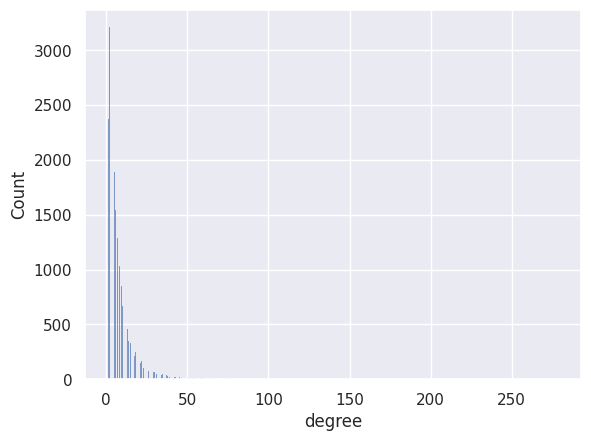

In [17]:
sns.histplot(data['degree'])

## Análise Visual

In [18]:
import netpixi

### Salvando grafo em formato ZipNet

In [74]:
gt_save(g, 'CondMat.net.gz')

### Carregando modelo para visualização

In [19]:
g = gt_load('CondMat.net.gz')

### Visualização inicial

In [20]:
r1 = netpixi.render('CondMat.net.gz');

In [21]:
#Ajustando propriedades
r1.vertex_default(size=5)
r1.edge_default( width=5)

#### Grafo salvo em png após modificações

<img width='600px' src="CondMat.net.gz.png"/>

## Posicionando o grafo com a ideia de force-directed graph drawing.

In [ ]:
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'CondMat_sfpd.net.gz')
r2 = netpixi.render('CondMat_sfpd.net.gz');

In [21]:
#Ajustando propriedades
r2.vertex_default(size=5)
r2.edge_default( width=1)

#### Grafo salvo em png após modificações

<img width="600px" src="CondMat_sfpd.net.gz.png" />

### Limpando e isolando a componente principal do grafo

Conforme percebido na figura anterior, há uma componente principal, podemos isolá-la para melhor visualização.

In [ ]:
g = gt_clean(g)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'CondMat_sfdp_clean.net.gz')
r3 = netpixi.render('CondMat_sfdp_clean.net.gz',infinite=True);

In [24]:
r3.vertex_default(size=5)
r3.edge_default( width=1)

#### Imagem do grafo gerado

<img src="CondMat_sfdp_clean.net.gz.png" width="600px"/>

EOF